In [ ]:
import numpy as np
from ReplayBuffer import ReplayBuffer
from TD3 import TD3
from Critic import Critic
from Actor import Actor
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler


In [3]:
state_dim = 6
action_dim = 19
max_time = 10
max_action = 500

In [ ]:
rb = ReplayBuffer(state_dim,action_dim)

In [ ]:
policy = TD3(state_dim,action_dim,max_time,max_action)

In [ ]:
for i in range(100):
    state = np.arange(6)
    action = np.arange(19)
    nxt_state = np.arange(6)
    reward = np.random.uniform(1000)
    rb.store(state,action,nxt_state,reward)

In [ ]:
state, action, nxt_state, reward = rb.sample(32)

In [ ]:
state[0]

In [ ]:
device = "cpu"

In [ ]:
state = torch.FloatTensor(state).to(device)
action = torch.FloatTensor(action).to(device)
nxt_state = torch.FloatTensor(nxt_state).to(device)
reward = torch.FloatTensor(reward).to(device)

In [ ]:
policy.train(rb,1,10)

In [19]:
from ReplayBuffer import ReplayBuffer
import os
import matplotlib.pyplot as plt


In [12]:
rb = ReplayBuffer(state_dim,action_dim,'../../../../../../ReplayBuffer.csv')

In [16]:
data = rb.dump()

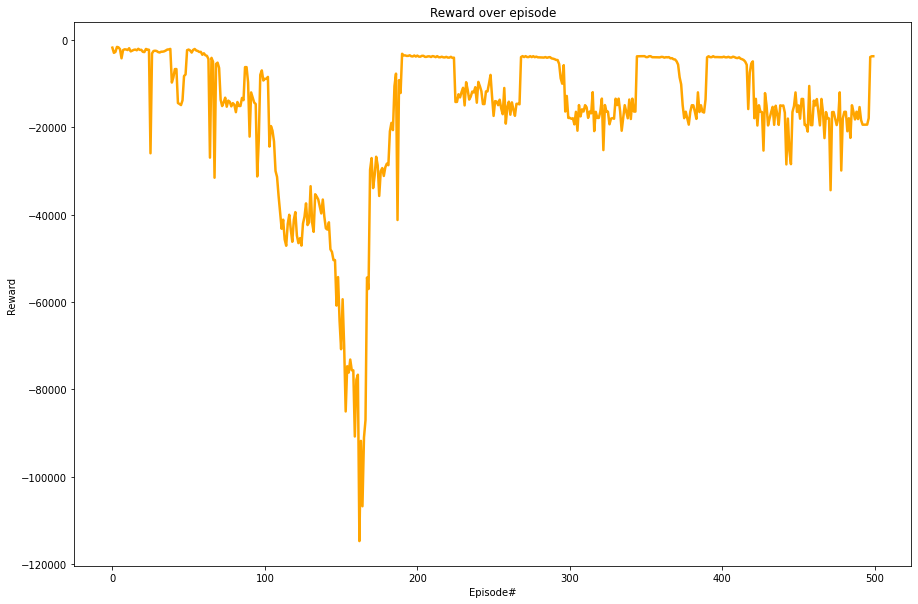

In [27]:
plt.figure(figsize=(15,10))
plt.title("Reward over episode")
plt.xlabel("Episode#")
plt.ylabel("Reward")
plt.plot(data['reward'], color="orange", linewidth=2.5)
plt.savefig('test.jpg')
plt.show()